# Plots and Figures for Glint


Bar Plot Function for Glint Data

Simply insert your parameters and this function will create a barplot to plot the mean accuracy for each condition (Natural, Feature, Shape)

## Barplot Function for Adult Behavioral Data

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import math

# Function: glint_barplot
def glint_barplot(data, extreme,chance):
    display_map = {
    "all_conditions": "All",
    "natural": "Natural",
    "shape": "Shape",
    "feature": "Feature",
    }
    condition_order = ["natural", "shape", "feature"]

    if extreme == False:
        sns.set_theme(style="white")
        fig, ax1 = plt.subplots(figsize=(4, 5))
        sns.barplot(
            data= data,
            x= 'condition',
            y= 'filtered_acc',
            hue = 'condition',
            order=condition_order,
            hue_order=condition_order,
            ax=ax1,
            capsize=0,
            errorbar=("ci", 95),
            palette = 'magma',
            legend=False,
            gap=0.1,
            width=0.8,
            err_kws={
                'linewidth': 4,      # Thickness of error bar lines
                'color': 'black',      # Color of error bars
                'alpha': 1,        # Transparency (0=invisible, 1=opaque)
    }
            )
        
        #Add individual subjects mean scores for that condition over the barplots
        sns.stripplot(
            data, x='condition', #Change to condition if we want to plot individual points for each condition instead of each test object class
            y='filtered_acc', 
            hue='condition',
            order=condition_order,
            hue_order=condition_order, 
            palette='magma', 
            ax=ax1, 
            size=3.5, 
            edgecolor='black', 
            linewidth= 0.8, 
            marker='o',
            alpha = 0.75
        )
        
        ax1.set_ylim(0.1, 1.0)
        ax1.set_ylabel('Accuracy')
        ax1.set_xlabel('Test Object Class')
        ax1.axhline(y=chance, color='black', linestyle='--', linewidth=1.5, zorder=11)
        ax1.set_xticklabels([display_map.get(t.get_text(), t.get_text()) for t in ax1.get_xticklabels()])

        sns.despine(fig=fig, top=True, right=True)

        

        plt.tight_layout()
        print(f"This is the plot for {experiment} Glint, extreme={extreme}")
        return fig, ax1
    elif extreme == True: 
        sns.set_theme(style="white")
        # Create a figure & axis here so the cell is self-contained
        fig2, ax2 = plt.subplots(figsize=(8, 6))

        # Draw a pointplot (specify order so x-axis goes from largest → smallest)
        sns.pointplot(
            data=data,
            x="stimulus_duration",
            y="filtered_acc",
            hue="condition",
            ax=ax2,
            order=[0.3, 0.136, 0.068, 0.034],
            capsize=0,
            errorbar= ("ci", 95),
            palette = 'magma',
            legend=False,
            err_kws={
                'linewidth': 4,      # Thickness of error bar lines
                'color': 'black',      # Color of error bars
                'alpha': 1,        # Transparency (0=invisible, 1=opaque)
                'markeredgewidth': 2,  # Width of the marker edge
    }

            )
        ax2.set_ylim(0.1, 1.0)
        ax2.set_ylabel('Accuracy')
        ax2.set_xlabel('Duration (ms)')
        ax2.axhline(y=chance, color='black', linestyle='--', linewidth=1.5, zorder=11)
        ax2.set_xticklabels([display_map.get(t.get_text(), t.get_text()) for t in ax2.get_xticklabels()])

        sns.despine(fig=fig2, top=True, right=True)
        plt.tight_layout()
        plt.show()
        print(f"This is the plot for {experiment} Glint, extreme={extreme}")
        return fig2, ax2





### Example Usage of glint_barplot

This is the plot for familiar Glint, extreme=False


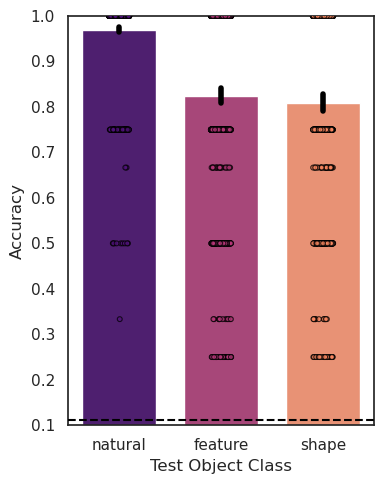

In [ ]:
# Parameters
from curses import version

import pandas as pd


experiment = 'familiar'  # 'familiar' or 'novel'

extreme_version = False

def chance_and_experiment_parameters(experiment, extreme_version):
    if experiment == 'familiar' and extreme_version ==True: #Familiar Extreme Glint
        chance_level = 1/6
        extreme = 'extreme'

    elif experiment == 'familiar' and extreme_version ==False: #Familiar Original Glint
        chance_level = 1/9
        extreme = 'original'

    elif experiment == 'novel' and extreme_version == True: #Novel Extreme Glint
        chance_level = 1/4
        extreme = 'extreme'
    
    elif experiment == 'novel' and extreme_version == False: #Novel Original Glint
        chance_level = 1/4
        extreme = 'original'

    return chance_level, extreme


chance_level, extreme = chance_and_experiment_parameters(experiment, extreme_version)

file_path = f'/zpool/vladlab/data_drive/glint_data/summary_data_csv/{experiment}_glint_{extreme}_cleaned.csv'
familiar_glint = pd.read_csv(file_path)

# Now use the function
fig, ax1 = glint_barplot(
    data=familiar_glint,
    extreme=False,
    chance= chance_level
)
plt.show()

## Barplot Function for Modelling Data

In [ ]:
def modelling_barplot(data, chance):
    condition_order = ["natural", "shape", "feature"]

    sns.set_theme(style="white")
    fig, ax1 = plt.subplots(figsize=(8, 5))
    sns.barplot(
        data= data,
        x= 'condition',
        y= 'acc',
        hue = 'model',
        order=condition_order,
        hue_order=condition_order,
        ax=ax1,
        capsize=0,
        errorbar=("ci", 95),
        palette = 'inferno',
        legend=True,
        gap=0.1,
        width=0.8,
        err_kws={
            'linewidth': 4,      # Thickness of error bar lines
            'color': 'black',      # Color of error bars
            'alpha': 1,        # Transparency (0=invisible, 1=opaque)
        })
    ax1.set_ylim(0, 1.0)
    ax1.set_ylabel('Accuracy')
    ax1.set_xlabel('Condition')
    ax1.axhline(y=chance, color='black', linestyle='--', linewidth=1.5, zorder=11)

    sns.despine(fig=fig, top=True, right=True)
    return fig, ax1
'''
def modelling_pointplot(data, chance):
    fig, ax1 = plt.subplots(figsize=(8, 5))
    # Draw a pointplot (specify order so x-axis goes from largest → smallest)
    sns.pointplot(
        data=data,
        x="condition",
        y="acc",
        hue="model",
        ax=ax1,
        capsize=0,
        errorbar= ("ci", 95),
        palette = 'magma',
        legend=False,
        err_kws={
            'linewidth': 4,      # Thickness of error bar lines
            'color': 'black',      # Color of error bars
            'alpha': 1,        # Transparency (0=invisible, 1=opaque)
            'markeredgewidth': 2,  # Width of the marker edge
    })
    ax1.set_ylim(0.1, 1.0)
    ax1.set_ylabel('Accuracy')
    ax1.set_xlabel('Condition')
    ax1.axhline(y=chance, color='black', linestyle='--', linewidth=1.5, zorder=11)
    return fig, ax1
    '''

### Example Usage of the modelling_barplot

# Human Behavioral Experiments Plotted

## Familiar Original

This is the plot for familiar Glint, extreme=False


/tmp/ipykernel_963337/572912504.py:60: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels([display_map.get(t.get_text(), t.get_text()) for t in ax1.get_xticklabels()])


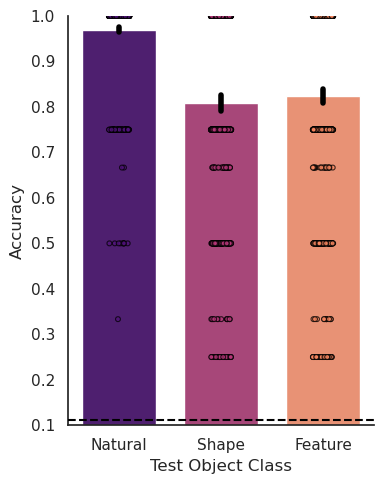

In [38]:
experiment = 'familiar'  # 'familiar' or 'novel'

extreme_version = False # Set to True for extreme version, False for original version

chance_level, extreme = chance_and_experiment_parameters('familiar', False)

file_path = f'/zpool/vladlab/data_drive/glint_data/summary_data_csv/{experiment}_glint_{extreme}_cleaned.csv'
familiar_glint = pd.read_csv(file_path)

# Now use the function
fig, ax1 = glint_barplot(
    data=familiar_glint,
    extreme=extreme_version,
    chance= chance_level
)
plt.show()

### Novel Original

This is the plot for novel Glint, extreme=False


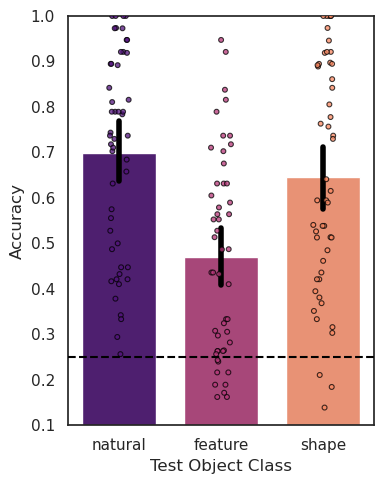

In [20]:
experiment = 'novel'  # 'familiar' or 'novel'

extreme_version = False # Set to True for extreme version, False for original version

chance_level, extreme = chance_and_experiment_parameters(experiment, extreme_version)

file_path = f'/zpool/vladlab/data_drive/glint_data/summary_data_csv/{experiment}_glint_{extreme}_cleaned.csv'
novel_glint = pd.read_csv(file_path)

# Now use the function
fig, ax1 = glint_barplot(
    novel_glint,
    extreme_version,
    chance_level
)
plt.show()

### Familiar Extreme

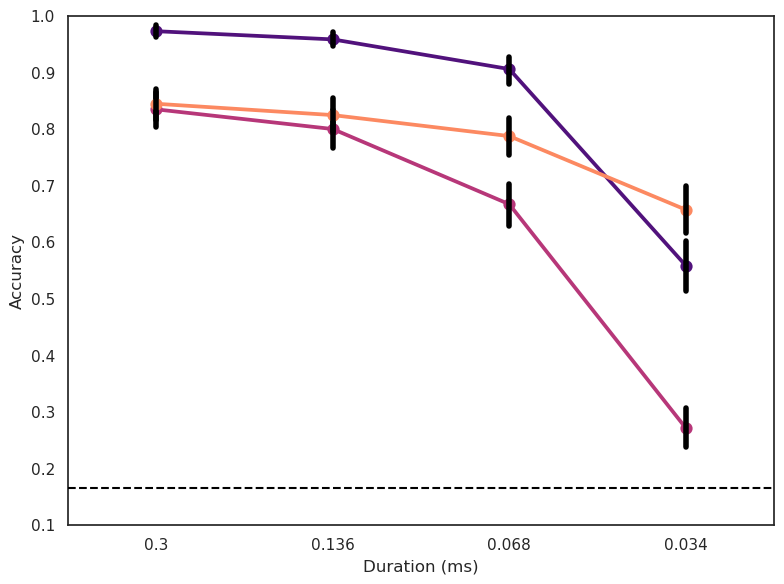

This is the plot for familiar Glint, extreme=True


In [21]:
experiment = 'familiar'  # 'familiar' or 'novel'

extreme_version = True # Set to True for extreme version, False for original version

chance_level, extreme = chance_and_experiment_parameters(experiment, extreme_version)

file_path = f'/zpool/vladlab/data_drive/glint_data/summary_data_csv/{experiment}_glint_{extreme}_cleaned.csv'
familiar_extreme = pd.read_csv(file_path)

# Now use the function
fig, ax1 = glint_barplot(
    familiar_extreme,
    extreme_version,
    chance_level
)
plt.show()

### Novel Extreme

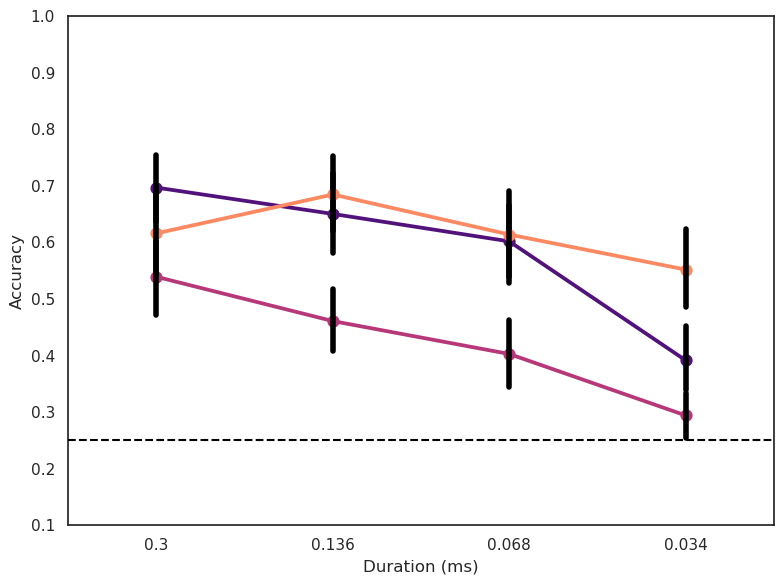

This is the plot for novel Glint, extreme=True


In [22]:
experiment = 'novel'  # 'familiar' or 'novel'

extreme_version = True # Set to True for extreme version, False for original version

chance_level, extreme = chance_and_experiment_parameters(experiment, extreme_version)

file_path = f'/zpool/vladlab/data_drive/glint_data/summary_data_csv/{experiment}_glint_{extreme}_cleaned.csv'
novel_extreme = pd.read_csv(file_path)

# Now use the function
fig, ax1 = glint_barplot(
    novel_extreme,
    extreme_version,
    chance_level
)
plt.show()

# Modeling Performance for Each of the experiments

## Familiar Experiment: Model Performance

### Let's Group all the data together into one dataframe

In [ ]:
import pandas as pd
# Here are the ConvNeXT KNN results loading and combining
convnext_results_file_path = '/zpool/vladlab/active_drive/arsch/GLINT/glint_modeling/results_familiar/convnext_KNN_all_conditions_9way_new.csv'
convnext = pd.read_csv(convnext_results_file_path)

#Clip
clip_vit_results_file_path = '/zpool/vladlab/active_drive/arsch/GLINT/glint_modeling/results_familiar/clip_vit_KNN_all_conditions_9way_new.csv'
clip = pd.read_csv(clip_vit_results_file_path)


# vit_dinov2
vit_dinov2_results_file_path = '/zpool/vladlab/active_drive/arsch/GLINT/glint_modeling/results_familiar/vit_dinov2_KNN_all_conditions_9way_new.csv'
vit_dinov2 = pd.read_csv(vit_dinov2_results_file_path)

# vit
vit_results_file_path = '/zpool/vladlab/active_drive/arsch/GLINT/glint_modeling/results_familiar/vit_KNN_all_conditions_9way_new.csv'
vit = pd.read_csv(vit_results_file_path)

# Combine all model results
combined_model_results = pd.concat([convnext, clip, vit_dinov2, vit], ignore_index=True)

### Call the Function modelling_barplot

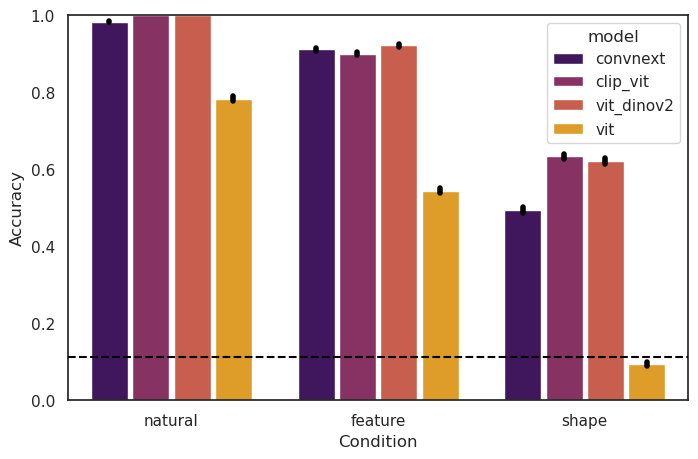

In [11]:
fig, ax1 = modelling_barplot(
    data=combined_model_results,
    chance= 1/9
)
plt.show()


Novel Glint

In [15]:
import pandas as pd
# Here are the ConvNeXT KNN results loading and combining
convnext_novel_path = '/zpool/vladlab/active_drive/arsch/GLINT/glint_modeling/results_novel/convnext_KNN_all_conditions_4way.csv'
convnext_csv = pd.read_csv(convnext_novel_path)

#Clip
clip_vit_novel_path = '/zpool/vladlab/active_drive/arsch/GLINT/glint_modeling/results_novel/clip_vit_KNN_all_conditions_4way.csv'
clip_csv = pd.read_csv(clip_vit_novel_path)

# vit_dinov2
vit_dinov2_novel_path = '/zpool/vladlab/active_drive/arsch/GLINT/glint_modeling/results_novel/vit_dinov2_KNN_all_conditions_4way.csv'
vit_dinov2_csv = pd.read_csv(vit_dinov2_novel_path)

# vit
vit_novel_path = '/zpool/vladlab/active_drive/arsch/GLINT/glint_modeling/results_novel/vit_KNN_all_conditions_4way.csv'
vit_csv = pd.read_csv(vit_novel_path)

# Combine all model results
novel_combined_model_results = pd.concat([convnext_csv, clip_csv, vit_dinov2_csv, vit_csv], ignore_index=True)

In [23]:
fig, ax1 = modelling_barplot(
    data=novel_combined_model_results,
    chance= 1/4
)
plt.show()

NameError: name 'modelling_barplot' is not defined

# Extra Plots 

### Barplot of Images across Condition and Animacy

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

def glint_barplot_by_animacy(data, chance):

    # Sort images by animacy so they're grouped together
    data_sorted = data.sort_values(['animacy', 'test_object_class'])
    animacy_order = sorted(data_sorted['animacy'].unique())
    
    # Create a figure per animacy group
    for animacy in animacy_order:
        animacy_data = data_sorted[data_sorted['animacy'] == animacy]
        images = sorted(animacy_data['test_object_class'].unique())
        n = len(images)
        ncols = min(n, 4)
        nrows = math.ceil(n / ncols)

        sns.set_theme(style="white")
        fig, axes = plt.subplots(nrows, ncols, figsize=(4 * ncols, 4 * nrows), sharey=True)
        if n == 1:
            axes = [axes]
        else:
            axes = axes.flatten()

        for i, image in enumerate(images):
            ax = axes[i]
            image_data = animacy_data[animacy_data['test_object_class'] == image]
            
            sns.barplot(
                data=image_data,
                x='condition',
                y='filtered_acc',
                hue='condition',
                ax=ax,
                palette='magma',
                errorbar=("ci", 95),
                capsize=0,
                legend=False,
                err_kws={'linewidth': 2, 'color': 'black', 'alpha': 1},
            )
            sns.stripplot(
                data=image_data,
                x='condition',
                y='filtered_acc',
                hue='condition',
                ax=ax,
                palette='magma',
                size=3.5,
                edgecolor='black',
                linewidth=0.8,
                alpha=0.75,
                legend=False,
            )
            ax.set_ylim(0, 1.0)
            ax.set_title(image)
            ax.set_xlabel('')
            ax.set_ylabel('Accuracy' if i % ncols == 0 else '')
            ax.axhline(y=chance, color='black', linestyle='--', linewidth=1.5, zorder=11)

        # Hide empty subplots
        for j in range(i + 1, len(axes)):
            axes[j].set_visible(False)

        fig.suptitle(f'Animacy: {animacy}', fontsize=16, fontweight='bold')
        plt.tight_layout()
        plt.show()

In [ ]:
# Example usage:
extreme = False
experiment = 'familiar'

if extreme == True:
    version = 'extreme'

elif extreme == False:
    version = 'original'

if experiment == 'familiar' and extreme ==True: #Familiar Extreme Glint
    chance_level = 1/6

elif experiment == 'familiar' and extreme ==False: #Familiar Original Glint
    chance_level = 1/9

elif experiment == 'novel':
    chance_level = 1/4

data = pd.read_csv(f'/zpool/vladlab/data_drive/glint_data/summary_data_csv/{experiment}_glint_{version}_cleaned.csv')

if 'data_sorted' in globals():
    del data_sorted

glint_barplot_by_animacy(data=data, chance=chance_level)